# ¿Qué probabilidades tenemos de Ganar en Blackjack?

En este ejercicio se realizarán simulaciones para determinar cuál es la probabilidad de ganar en un juego de Blackjack contra la casa. 

A continuación se explican las reglas del juego: 

## Reglas
-----

1. Las cartas del 2 al 10 valen su valor nominal, las cartas de figura (J, Q, K) valen 10 y el as (A) vale 11 o 1, dependiendo de qué valor no haga que la mano supere los 21 puntos.

2. El jugador recibe dos cartas iniciales y el crupier recibe dos cartas, con una carta boca arriba y la otra boca abajo.
3. El jugador puede pedir cartas adicionales (hacer "hit") hasta que decida plantarse ("stand") o supere los 21 puntos.
4. En esta simulación, el jugador seguirá una estrategia básica simplificada: pedirá cartas hasta que su puntuación sea igual o superior a 17.
5. Una vez que el jugador se planta, el crupier revela su carta oculta y sigue las siguientes reglas: si su puntuación es menor a 17, debe pedir cartas adicionales hasta que su puntuación sea igual o superior a 17.
6. Si el crupier supera los 21 puntos, el jugador gana automáticamente.
7. Si el jugador y el crupier tienen la misma puntuación, el juego termina en empate (empate) y no se cuenta como una victoria del jugador.

----

Simularemos el resultado de muchas partidas para determinar cuál es la probabilidad de ganar en este juego aplicando la estrategia simplificada.


# 1. Simulación del Juego

A continuación debemos programar el funcionamiento del juego utilizando python! 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Requerimos de una función que permita calcular el puntaje de la mano. Es decir, dado que se tiene una lista de cartas en la mano, ¿cuánto puntaje tiene?


In [2]:
def puntaje_mano(mano):
  """
  Calcula el puntaje de la mano.

  Params
  -------
    mano (list):
      Una lista que contiene el valor de cada carta

  Returns
  -------
    score (int):
      El puntaje de la mano actual, teniendo en cuenta las A
  """

  ### Sume el puntaje actual de la mano
  ### Las A por ahora valen 11 
  score = sum(mano)

  ### Determine el número de A que hay
  num_ases = mano.count(11)

  ### Determine cuántas A, si hay, deben valer 1 y cuáles 11
  ## Pista: Para saber si debe cambiar el valor de la A, es porque score > 21
  while (score > 21) and (num_ases > 0):
    score -= 10
    num_ases -= 1

  return score


Si quedó bien, para las siguientes manos su función debe dar:
- [2, 2, 4, 10] -> 18
- [11, 11, 11, 11] -> 14

In [3]:
puntaje_mano([2, 2, 4, 10])

18

In [4]:
puntaje_mano([11, 11, 11, 11])

14

A continuación se programará el juego como tal. 
Se requiere:
- Generar una baraja
- Barajar la baraja. utilice la función [`np.random.shuffle`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html).
- Darle 2 cartas (secretas) al jugador
- Darle 2 cartas al crupier

In [5]:
def get_deck():

  ### Simule las cartas que hay en un Palo
  ### Recuerde que son del 2 - 10, J, Q, K (valen 10 c/u) y un A (vale 11).
  cartas_palo = list(range(2, 11)) + [10, 10, 10, 11]

  ###

  deck = cartas_palo*4 # 4 palos

  ### Baraje el maso
  np.random.shuffle(deck)
  ###

  return deck

Al correr la siguiente función, debe garantizarse que existan 52 cartas. 

In [25]:
len(get_deck())

52

Una vez creada la baraja, debe repartir las manos iniciales para cada jugador. 
- Jugador recibe 2 cartas
- Crupier recibe 2 cartas

Adicionalmente, programar la estrategia de juego: 
- Los jugadores roban hasta tener 17 o más puntos
- Si al robar se pasa de 21, pierde automáticamente. 
- El jugador va primero que el crupier

In [61]:
def blackjack_game():
  """
  Simula una partida de blackjack
  Retorna True si gana el jugador y False si gana la casa.
  """

  # Tomamos una baraja aleatoria
  deck = get_deck()

  ### Dele a cada jugador dos cartas. 
  ### Por facilidad, utilice el método `.pop` de las listas

  mano_jugador = [deck.pop(), deck.pop()]
  mano_crupier = [deck.pop(), deck.pop()]
  
  ###

  ### Aplique la estrategia simplificada: robar hasta 17 o más

  while puntaje_mano(mano_jugador) < 17:
    mano_jugador.append(deck.pop())

  ###

  # Si el jugador se pasa de 21, el crupier gana automáticamente

  if puntaje_mano(mano_jugador) > 21:
    return False


  # Si el jugador no pierde, le toca a la casa

  ### Aplique la estrategia simplificada para el crupier
  while puntaje_mano(mano_crupier) < 17:
    mano_crupier.append(deck.pop())

  ###

  # Si el crupier se pasa de 21, gana el jugador
  if puntaje_mano(mano_crupier) > 21:
    return True


  # Si ninguno de los jugadores perdió, gana quien tenga el puntaje más alto
  # Si empatan, pierde el jugador

  ###
  return puntaje_mano(mano_jugador) > puntaje_mano(mano_crupier)

  ###

Con lo anterior, ya tenemos simulado un juego de Blackjack!

In [49]:
print(f'En esta partida, usted { "ganó" if blackjack_game() else "perdió"}.')

En esta partida, usted ganó.


---
# Simulación

A continuación simularemos una noche de Blackjack en un casino. En este casino, entraron 100 personas. Por lo tanto, hubo 100 juegos de blackjack. ¿Qué tan probable es que ganen los jugadores/pierda la casa?

In [62]:
np.random.seed(42)
ensayos = 1000
victorias = 0

for _ in range(ensayos):
    if blackjack_game():
        victorias += 1

proporcion_victorias = victorias / ensayos

print(f"Proporción de victorias del jugador en {ensayos} ensayos: {proporcion_victorias:.2f}")


Proporción de victorias del jugador en 1000 ensayos: 0.42


# Ley de los Grandes Números

Podemos evidenciar que si aumentamos la cantidad de repeticiones de nuestro ejemplo, la probabilidad de ganar se va a acercar mucho al 42%

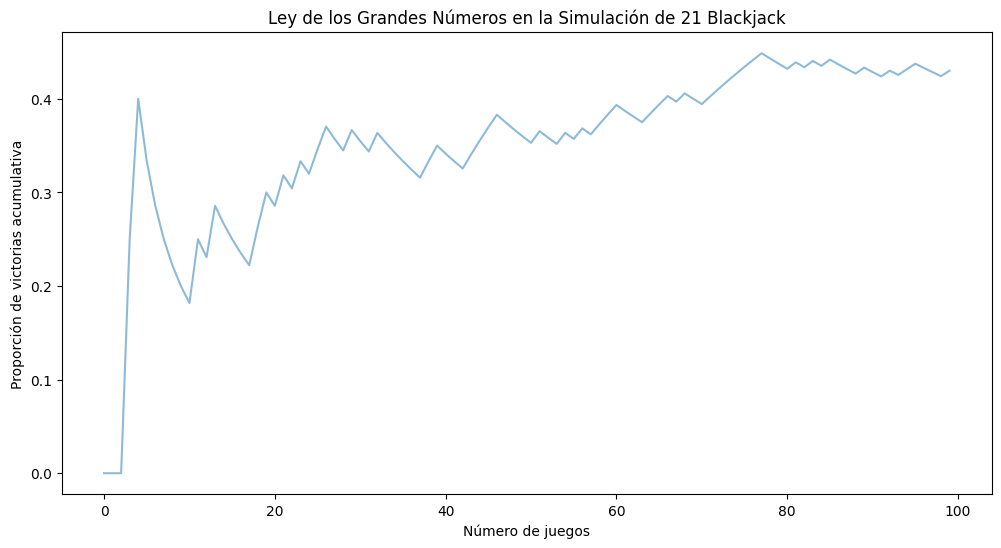

In [68]:
juegos = 100
resultados = []

### Realice una simulación en la que juegue 1000 partidas
### Guarde el resultado (1 ganó) o (0 perdió) en resultados
for j in range(juegos):
    if blackjack_game():
        resultados.append(1)
    else:
      resultados.append(0)

###

# Cálculo de la proporción de victorias acumulativa
proporcion_victorias_acumulativa = np.cumsum(resultados) / (np.arange(juegos) + 1)

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfica de la proporción de victorias acumulativa
plt.plot(proporcion_victorias_acumulativa.T, alpha=0.5)
plt.xlabel("Número de juegos")
plt.ylabel("Proporción de victorias acumulativa")
plt.title("Ley de los Grandes Números en la Simulación de 21 Blackjack")

plt.show()

# ¿Cómo sabemos qué tanto podemos confiar en esta estimación?

Para esto existen los intervalos de confianza. 

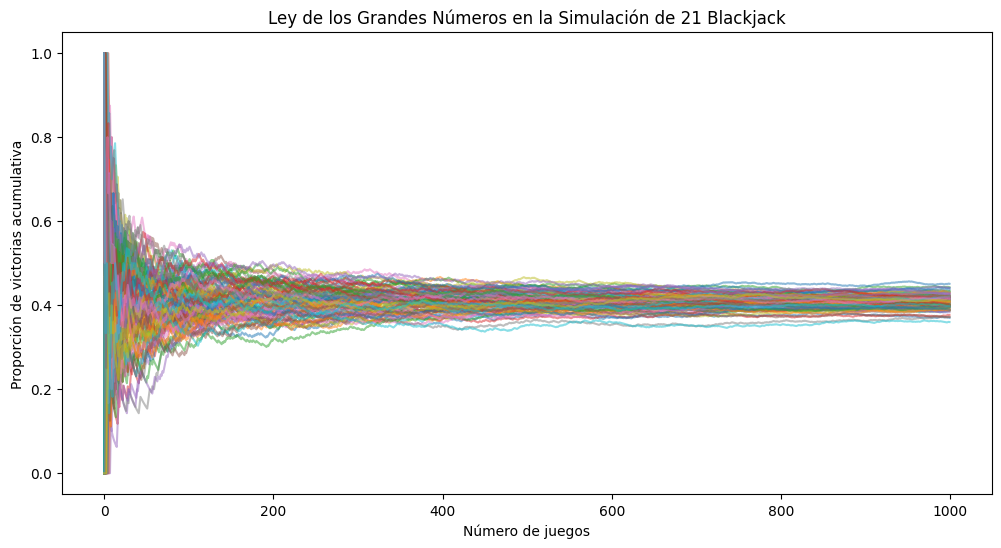

In [69]:
juegos = 1000
ensayos = 100
resultados = np.zeros((ensayos, juegos))

for i in range(ensayos):
    for j in range(juegos):
        if blackjack_game():
            resultados[i, j] = 1

# Cálculo de la proporción de victorias acumulativa
proporcion_victorias_acumulativa = np.cumsum(resultados, axis=1) / (np.arange(juegos) + 1)

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfica de la proporción de victorias acumulativa
plt.plot(proporcion_victorias_acumulativa.T, alpha=0.5)
plt.xlabel("Número de juegos")
plt.ylabel("Proporción de victorias acumulativa")
plt.title("Ley de los Grandes Números en la Simulación de 21 Blackjack")

plt.show()

# Intervalos de Confianza

Ensayo 1:
Valor promedio: 0.4104
IC 95% (Normal): ±0.9641
IC 95% (Empírico): ±0.5000

Ensayo 100:
Valor promedio: 0.4089
IC 95% (Normal): ±0.0964
IC 95% (Empírico): ±0.1000

Ensayo 500:
Valor promedio: 0.4087
IC 95% (Normal): ±0.0431
IC 95% (Empírico): ±0.0430

Ensayo 1000:
Valor promedio: 0.4085
IC 95% (Normal): ±0.0305
IC 95% (Empírico): ±0.0300



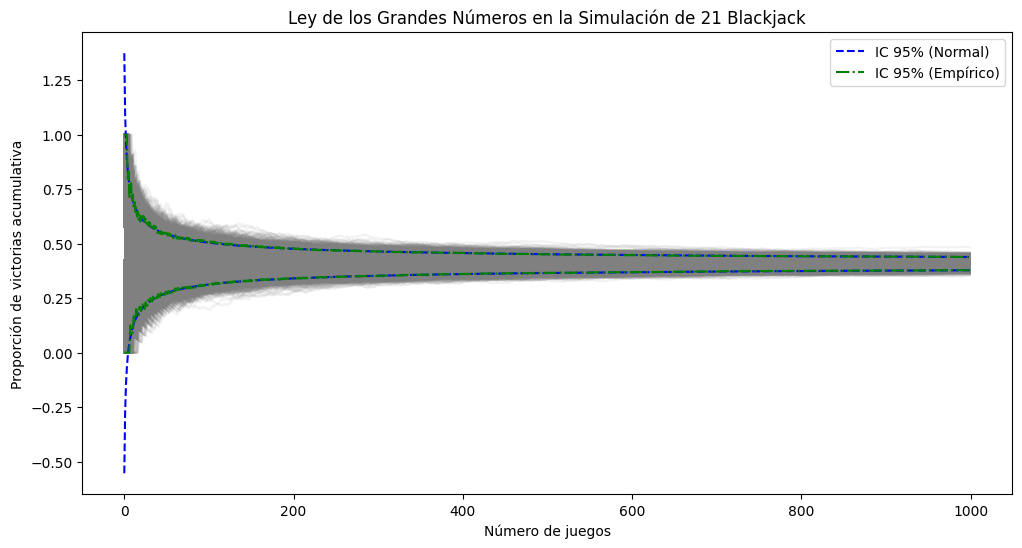

In [70]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # Fijamos la semilla para obtener resultados reproducibles
ensayos = 10000
juegos = 1000
resultados = np.zeros((ensayos, juegos))

for i in range(ensayos):
    for j in range(juegos):
        if blackjack_game():
            resultados[i, j] = 1

# Cálculo de la proporción de victorias acumulativa
proporcion_victorias_acumulativa = np.cumsum(resultados, axis=1) / (np.arange(juegos) + 1)

# Cálculo del intervalo de confianza del 95% usando la distribución normal
media_acumulativa = np.mean(proporcion_victorias_acumulativa, axis=0)
var_acumulativa = media_acumulativa * (1 - media_acumulativa) / (np.arange(juegos) + 1)
z = 1.96
intervalo_confianza_normal = (media_acumulativa - z * np.sqrt(var_acumulativa),
                              media_acumulativa + z * np.sqrt(var_acumulativa))

# Cálculo del intervalo de confianza del 95% usando los cuantiles empíricos
percentiles = np.percentile(proporcion_victorias_acumulativa, [2.5, 97.5], axis=0)

# Imprimir el valor promedio y los intervalos de confianza para los ensayos deseados
ensayos_deseados = [1, 100, 500, 1000]
for ensayo in ensayos_deseados:
    print(f"Ensayo {ensayo}:")
    print(f"Valor promedio: {media_acumulativa[ensayo-1]:.4f}")
    print(f"IC 95% (Normal): ±{z * np.sqrt(var_acumulativa[ensayo-1]):.4f}")
    print(f"IC 95% (Empírico): ±{(percentiles[1][ensayo-1] - percentiles[0][ensayo-1]) / 2:.4f}")
    print()

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfica de la proporción de victorias acumulativa
plt.plot(proporcion_victorias_acumulativa.T, alpha=0.1, color='gray')
plt.xlabel("Número de juegos")
plt.ylabel("Proporción de victorias acumulativa")
plt.title("Ley de los Grandes Números en la Simulación de 21 Blackjack")

# Gráfica del intervalo de confianza del 95% usando la distribución normal
plt.plot(intervalo_confianza_normal[0], color='blue', linestyle='--', label='IC 95% (Normal)')
plt.plot(intervalo_confianza_normal[1], color='blue', linestyle='--')

# Gráfica del intervalo de confianza del 95% usando los cuantiles empíricos
plt.plot(percentiles[0], color='green', linestyle='-.', label='IC 95% (Empírico)')
plt.plot(percentiles[1], color='green', linestyle='-.')

plt.legend()
plt.show()


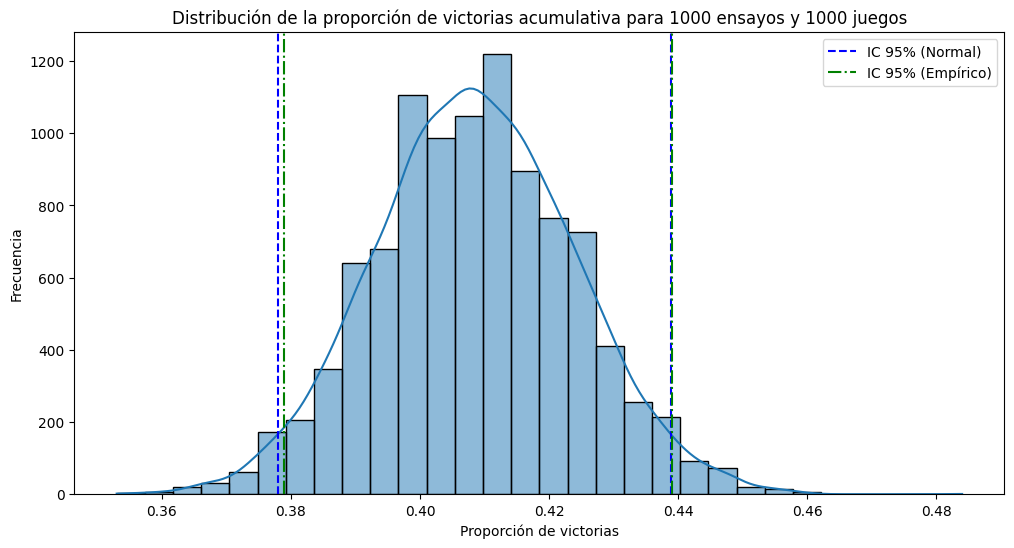

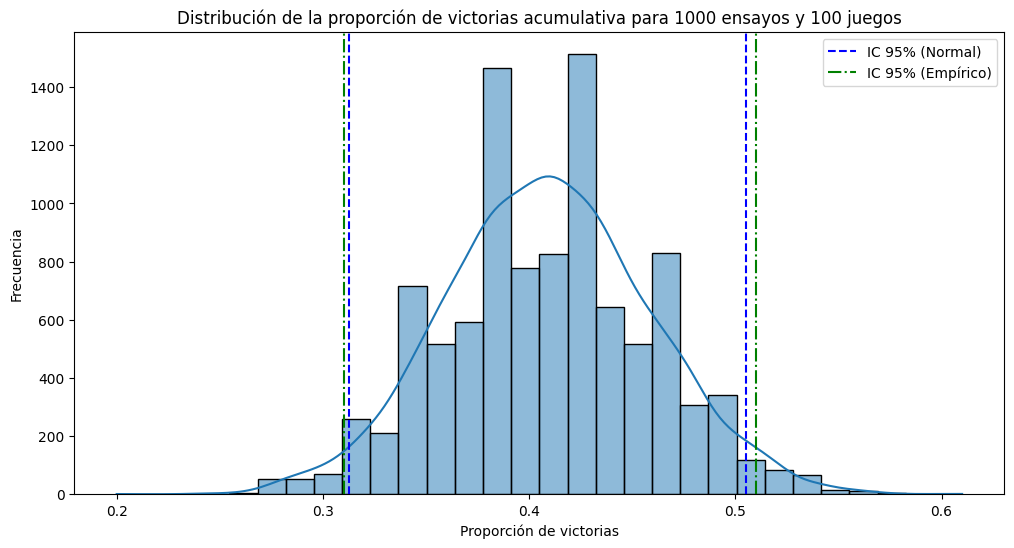

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution plot for ensayos = 1000
plt.figure(figsize=(12, 6))
sns.histplot(proporcion_victorias_acumulativa[:, 999], bins=30, kde=True)
plt.axvline(intervalo_confianza_normal[0][999], color='blue', linestyle='--', label='IC 95% (Normal)')
plt.axvline(intervalo_confianza_normal[1][999], color='blue', linestyle='--')
plt.axvline(percentiles[0][999], color='green', linestyle='-.', label='IC 95% (Empírico)')
plt.axvline(percentiles[1][999], color='green', linestyle='-.')
plt.xlabel("Proporción de victorias")
plt.ylabel("Frecuencia")
plt.title("Distribución de la proporción de victorias acumulativa para 1000 ensayos y 1000 juegos")
plt.legend()
plt.show()

# Distribution plot for ensayos = 100
plt.figure(figsize=(12, 6))
sns.histplot(proporcion_victorias_acumulativa[:, 99], bins=30, kde=True)
plt.axvline(intervalo_confianza_normal[0][99], color='blue', linestyle='--', label='IC 95% (Normal)')
plt.axvline(intervalo_confianza_normal[1][99], color='blue', linestyle='--')
plt.axvline(percentiles[0][99], color='green', linestyle='-.', label='IC 95% (Empírico)')
plt.axvline(percentiles[1][99], color='green', linestyle='-.')
plt.xlabel("Proporción de victorias")
plt.ylabel("Frecuencia")
plt.title("Distribución de la proporción de victorias acumulativa para 1000 ensayos y 100 juegos")
plt.legend()
plt.show()
